In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('dataset/train.csv')

In [3]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4]:
df.shape

(36992, 25)

In [5]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [7]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

### Null Values are in:-
- region category
- points_in_wallet
- preferred_offer_types

## Dealing with categorical null values

In [8]:
df['region_category'].unique()

array(['Village', 'City', 'Town', nan], dtype=object)

<AxesSubplot:xlabel='region_category', ylabel='count'>

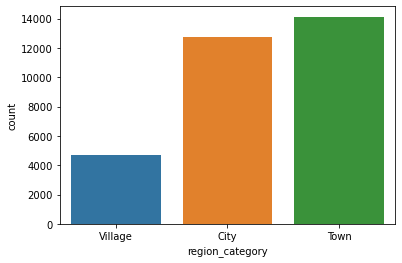

In [9]:
import seaborn as sns
sns.countplot(x='region_category',data=df)

In [10]:
df['region_category'].mode()[0]

'Town'

In [11]:
df['preferred_offer_types'].unique()

array(['Gift Vouchers/Coupons', 'Credit/Debit Card Offers',
       'Without Offers', nan], dtype=object)

In [12]:
df['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

<AxesSubplot:xlabel='preferred_offer_types', ylabel='count'>

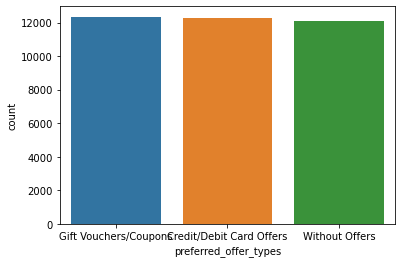

In [13]:
sns.countplot(x='preferred_offer_types',data=df)

In [14]:
df['region_category'].fillna(df['region_category'].mode()[0],inplace=True)
df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0],inplace=True)

## Dealing with numerical null values

<AxesSubplot:xlabel='points_in_wallet'>

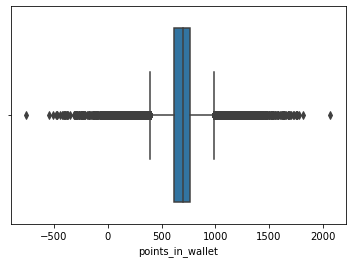

In [15]:
sns.boxplot(x='points_in_wallet',data=df)

In [16]:
df['points_in_wallet'].median()

697.62

In [17]:
df['points_in_wallet'].fillna(df['points_in_wallet'].median(),inplace=True)

In [18]:
df.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [19]:
from pandas_profiling import ProfileReport
profile=ProfileReport(df)

In [20]:
# profile.to_file(output_file='profile_report.html')

- from profile report we get that past_complaint and complaint_status have high corr

In [21]:
df[['complaint_status','past_complaint']].head()

,complaint_status,past_complaint
0,Not Applicable,No
1,Solved,Yes
2,Solved in Follow-up,Yes
3,Unsolved,Yes
4,Solved,Yes


In [22]:
df.drop('complaint_status',axis=1,inplace=True)

In [23]:
df.shape

(36992, 24)

In [24]:
list=[]
for x in df:
    # print(type(df[x][1]))
    if type(df[x][1])==type(np.int64(1)) or type(df[x][1])==type(np.float64(1)):
        list.append(x)

In [25]:
list

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'points_in_wallet',
 'churn_risk_score']

In [26]:
df1=df[list]

In [27]:
df1

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,18,17,300.630000,53005.25,781.750000,2
1,32,16,306.340000,12838.38,697.620000,1
2,44,14,516.160000,21027.00,500.690000,5
3,37,11,53.270000,25239.56,567.660000,5
4,31,20,113.130000,24483.66,663.060000,5
...,...,...,...,...,...,...
36987,46,2,-650.682759,27277.68,639.510000,4
36988,29,13,-638.123421,11069.71,527.990000,5
36989,23,12,154.940000,38127.56,680.470000,4
36990,53,15,482.610000,2378.86,197.264414,3


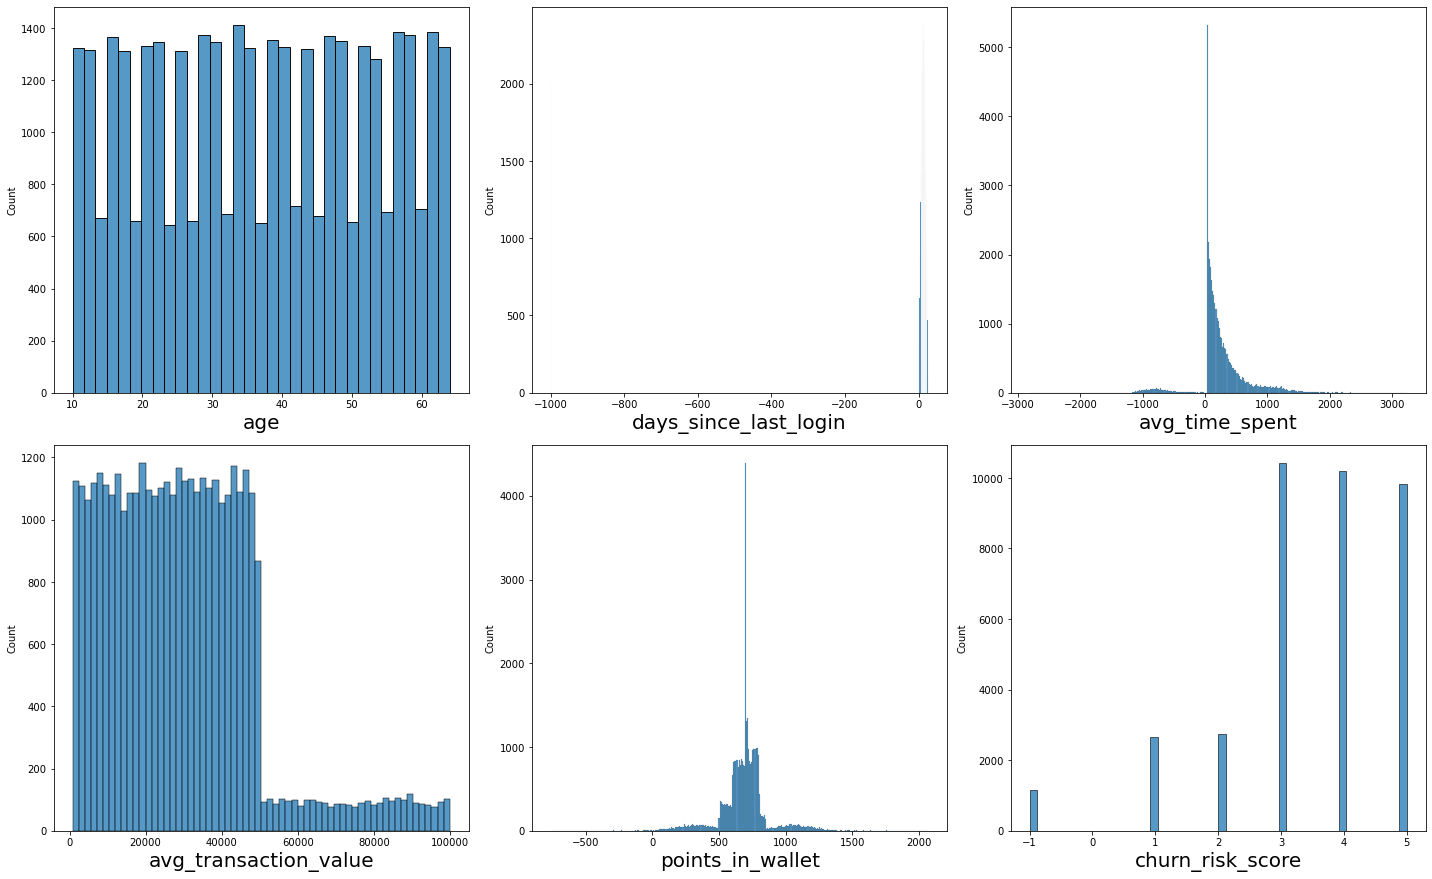

In [28]:
plt.figure(figsize=(20,30))
plotnumber=1

for col in df1:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.histplot(df1[col])
        plt.xlabel(col,fontsize=20)
        plotnumber+=1
plt.tight_layout()

In [29]:
df['joining_day']=pd.to_datetime(df.joining_date,format='%Y/%m/%d').dt.day
df['joining_month']=pd.to_datetime(df.joining_date,format='%Y/%m/%d').dt.month
df['joining_year']=pd.to_datetime(df.joining_date,format='%Y/%m/%d').dt.year

In [30]:
df.drop('joining_date',axis=1,inplace=True)

In [31]:
df[['last_visit_time_hour','last_visit_time_minutes','last_visit_time_seconds']] = df['last_visit_time'].astype(str).str.split(':', expand=True).astype(int)
df.drop(['last_visit_time'], axis=1, inplace=True)

In [32]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,last_visit_time_seconds
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,Yes,No,Products always in Stock,2,17,8,2017,16,8,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,No,Yes,Quality Customer Care,1,28,8,2017,12,38,13
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,11,11,2016,22,53,21
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,29,10,2016,15,57,50
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,Yes,Yes,Poor Website,5,12,9,2017,15,46,44


In [33]:
df['gender'].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

In [34]:
gender = pd.get_dummies(df[['gender']])
gender.drop('gender_Unknown',inplace=True,axis=1)

In [35]:
gender.head()

,gender_F,gender_M
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [36]:
df['region_category'].value_counts()

Town       19556
City       12737
Village     4699
Name: region_category, dtype: int64

In [37]:
region = pd.get_dummies(df[['region_category']], drop_first=True)
region.head()

,region_category_Town,region_category_Village
0,0,1
1,0,0
2,1,0
3,0,0
4,0,0


In [38]:
df['membership_category'].value_counts()

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64

In [39]:
membership = pd.get_dummies(df[['membership_category']], drop_first=True)
membership.head()

,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [40]:
df.joined_through_referral.value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [41]:
referal = pd.get_dummies(df[['joined_through_referral']], drop_first=True)
referal.head()

,joined_through_referral_No,joined_through_referral_Yes
0,1,0
1,0,0
2,0,1
3,0,1
4,1,0


In [42]:
df.preferred_offer_types.value_counts()

Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

In [43]:
offer = pd.get_dummies(df[['preferred_offer_types']], drop_first=True)
offer.head()

,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


In [44]:
feedback = pd.get_dummies(df[['feedback']], drop_first=True)
feedback.head()

,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [45]:
complaint = pd.get_dummies(df[['past_complaint']], drop_first=True)
complaint.head()

,past_complaint_Yes
0,0
1,1
2,1
3,1
4,1


In [46]:
application = pd.get_dummies(df[['offer_application_preference']], drop_first=True)
application.head()

,offer_application_preference_Yes
0,1
1,0
2,1
3,1
4,1


In [47]:
discount = pd.get_dummies(df[['used_special_discount']], drop_first=True)
discount.head()

,used_special_discount_Yes
0,1
1,1
2,0
3,0
4,0


In [48]:
internet = pd.get_dummies(df[['internet_option']], drop_first=True)
internet.head()

,internet_option_Mobile_Data,internet_option_Wi-Fi
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [49]:
medium = pd.get_dummies(df[['medium_of_operation']], drop_first=True)
medium.head()

,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone
0,0,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [50]:
df_train = pd.concat([df, gender, region, membership, referal, offer, medium, internet, discount, application, complaint, feedback ], axis = 1)
df_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,1,0,0,0,0,1,0,0,0,0
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,0,1,0,0,0,0,1,0,0,0
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,1,1,0,0,1,0,0,0,0,0
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,1,1,0,0,1,0,0,0,0,0
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,1,1,0,0,1,0,0,0,0,0


In [51]:
df_train.shape

(36992, 57)

In [52]:
df_train.drop(["customer_id", "Name", "gender", "security_no", "region_category", "membership_category", "joined_through_referral", "referral_id", "preferred_offer_types", "medium_of_operation", "internet_option", "used_special_discount", "offer_application_preference", "past_complaint", "feedback", "avg_frequency_login_days" ], axis = 1, inplace = True)

In [53]:
df_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.75,2,17,8,2017,16,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306.34,12838.38,697.62,1,28,8,2017,12,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516.16,21027.00,500.69,5,11,11,2016,22,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,567.66,5,29,10,2016,15,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,663.06,5,12,9,2017,15,...,1,1,0,0,1,0,0,0,0,0


In [54]:
tf = pd.read_csv("dataset/test.csv")
tf.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


## Test daatset

In [55]:
tf['region_category']= tf['region_category'].fillna(tf['region_category'].mode()[0])
tf['preferred_offer_types']= tf['preferred_offer_types'].fillna(tf['preferred_offer_types'].mode()[0])

# handle numerical missing column
tf['points_in_wallet']= tf['points_in_wallet'].fillna(tf['points_in_wallet'].mean())

# drop one column
tf.drop('complaint_status', axis=1, inplace=True)

# Exploratory data analysis
tf["joining_day"] = pd.to_datetime(tf.joining_date, format="%Y/%m/%d").dt.day
tf["joining_month"] = pd.to_datetime(tf.joining_date, format="%Y/%m/%d").dt.month
tf["joining_year"] = pd.to_datetime(tf.joining_date, format="%Y/%m/%d").dt.year

tf.drop(["joining_date"], axis=1, inplace=True)

tf[['last_visit_time_hour','last_visit_time_minutes','last_visit_time_seconds']] = tf['last_visit_time'].astype(str).str.split(':', expand=True).astype(int)

tf.drop(["last_visit_time"], axis = 1, inplace = True)

gender = pd.get_dummies(tf[['gender']], drop_first=True)
region = pd.get_dummies(tf[['region_category']], drop_first=True)
membership = pd.get_dummies(tf[['membership_category']], drop_first=True)
referal = pd.get_dummies(tf[['joined_through_referral']], drop_first=True)
offer = pd.get_dummies(tf[['preferred_offer_types']], drop_first=True)
medium = pd.get_dummies(tf[['medium_of_operation']], drop_first=True)
internet = pd.get_dummies(tf[['internet_option']], drop_first=True)
discount = pd.get_dummies(tf[['used_special_discount']], drop_first=True)
application = pd.get_dummies(tf[['offer_application_preference']], drop_first=True)
complaint = pd.get_dummies(tf[['past_complaint']], drop_first=True)
feedback = pd.get_dummies(tf[['feedback']], drop_first=True)

df_test = pd.concat([tf, gender, region, membership, referal, offer, medium, internet, discount, application, complaint, feedback ], axis = 1)

df_test.drop(["customer_id", "Name", "gender", "security_no", "region_category", "membership_category", "joined_through_referral", "referral_id", "preferred_offer_types", "medium_of_operation", "internet_option", "used_special_discount", "offer_application_preference", "past_complaint", "feedback", "avg_frequency_login_days" ], axis = 1, inplace = True)

df_test.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,50,12,386.26,40721.44,733.830000,2,11,2015,7,19,...,0,0,0,1,0,0,0,0,0,0
1,41,11,37.80,9644.40,726.000000,1,3,2016,22,21,...,0,0,0,0,1,0,0,0,0,0
2,31,18,215.36,3693.25,713.780000,3,3,2017,16,40,...,0,1,0,0,0,0,0,0,0,0
3,64,-999,44.57,36809.56,744.970000,18,8,2017,14,56,...,0,1,0,0,0,0,0,0,1,0
4,16,6,349.88,40675.86,299.048351,5,5,2015,2,57,...,1,1,0,0,1,0,0,0,0,0


In [56]:
df_train.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet', 'churn_risk_score',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_F',
       'gender_M', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
       '

In [57]:
x=df_train.loc[:,['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_F',
       'gender_M', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
       'past_complaint_Yes', 'feedback_Poor Customer Service',
       'feedback_Poor Product Quality', 'feedback_Poor Website',
       'feedback_Products always in Stock', 'feedback_Quality Customer Care',
       'feedback_Reasonable Price', 'feedback_Too many ads',
       'feedback_User Friendly Website']]

In [58]:
y= df_train[['churn_risk_score']]
y.head()

,churn_risk_score
0,2
1,1
2,5
3,5
4,5


In [59]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

C:\Users\Hridey\AppData\Local\Temp\ipykernel_21872\1289823182.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(x,y)


ExtraTreesRegressor()

In [60]:
print(selection.feature_importances_)

[0.0238151  0.02061709 0.02548977 0.0829832  0.06674759 0.02404655
 0.02343988 0.01418821 0.02352834 0.02375456 0.02474065 0.00585308
 0.00603905 0.01088175 0.00722262 0.03142355 0.13479432 0.03841185
 0.03123738 0.05556884 0.00831106 0.00902813 0.00965901 0.00972803
 0.00605647 0.00828007 0.00816982 0.0088495  0.00973125 0.00815488
 0.00701891 0.01151218 0.00809108 0.00809472 0.00670018 0.04764793
 0.05102224 0.04593554 0.00774078 0.04548481]


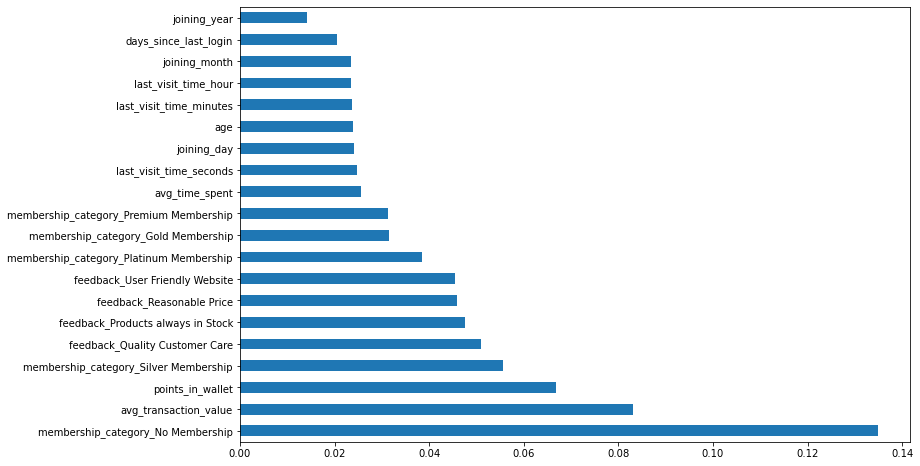

In [61]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

C:\Users\Hridey\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
x_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
3313,49,2,572.770000,19641.41,600.54,26,3,2015,7,26,...,1,1,0,0,0,0,0,0,1,0
28260,42,16,1427.643434,48511.87,700.92,2,10,2015,11,43,...,1,1,1,0,0,0,0,0,0,0
31412,10,-999,-779.419727,46612.57,744.65,8,4,2016,2,41,...,1,1,0,0,0,0,0,0,1,0
6700,12,9,245.010000,95291.95,697.62,23,2,2016,15,29,...,0,1,0,0,0,0,0,1,0,0
31958,28,14,308.770000,45564.89,716.28,2,1,2017,10,59,...,0,1,0,0,1,0,0,0,0,0


In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

C:\Users\Hridey\AppData\Local\Temp\ipykernel_4432\2782890027.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier()

In [67]:
print("training accuracy is : ", rf.score(x_train, y_train)*100)

training accuracy is :  100.0


In [68]:

print("testing accuracy is : ", rf.score(x_test, y_test)*100)


testing accuracy is :  74.91552912555751


In [69]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [70]:
print("testing accuracy is : ", model.score(x_test, y_test)*100)

testing accuracy is :  70.38789025543993


In [72]:
!pip install xgboost

In [62]:
from xgboost import XGBClassifier
xg = XGBClassifier(objective='binary:logistic')
xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [63]:
print("training accuracy is : ", xg.score(x_train, y_train)*100)

training accuracy is :  93.26529922616835


In [64]:
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

testing accuracy is :  75.45614272198947


In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
param_grid={
    'learning_rate':[1,0.5,0.1,0.01],
    'max_depth':[3,5,10,20],
    'n_estimators':[10,50,100,200]
}

In [85]:
grid = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), param_grid, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.745 total time=   4.3s
[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.745 total time=   4.1s
[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.746 total time=   4.1s
[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.735 total time=   4.2s
[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.750 total time=   4.3s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.754 total time=   3.2s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.759 total time=   3.3s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.761 total time=   3.3s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.758 total time=   3.2s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.764 total ti

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_c...
                                           max_delta_step=None, max_depth=None,
                                  

In [86]:
grid.best_params_

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.5}

In [66]:
xg = XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.5)
xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [67]:
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

testing accuracy is :  76.19948641708338


In [70]:
import pickle
file = 'xgboost_model.pkl'
pickle.dump(xg, open(file, 'wb'))

In [71]:
load_model = pickle.load(open(file, 'rb'))
y_prep = load_model.predict(x_test)
y_prep


array([1, 4, 5, ..., 3, 3, 4], dtype=int64)

In [84]:
import xgboost as xgb
model = pickle.load(open('xgboost_model.pkl', 'rb'))


In [83]:
print(model.feature_names)

None


In [85]:
model.predict(x_test)

array([1, 4, 5, ..., 3, 3, 4], dtype=int64)